In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] =8
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 8 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ


import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_csv(filename:str):
    df = pd.read_csv(filename,header=None)
    df.columns = ["input","freq","Total","DUT"]
    remove_input = df[(df["Total"].isnull()) | (df["DUT"].isnull())]["input"]
    print(f"list null contains {len(remove_input)}")
    df=df.drop(df[df["input"].isin(remove_input)].index)
    df["diff"] = df["Total"]-df["DUT"]
    return df

def get_energy(df:pd.DataFrame):
    input_list=set(df["input"])
    Ediss_list =[]
    print(len(input_list))
    df2 = pd.DataFrame(index=[],columns=df.columns)
    for input_pat in input_list:
        pat1 = df[(df["input"]==input_pat)]
        linest = pat1[(pat1["freq"]<=1000)]
        fuga = np.polyfit(linest["freq"],linest["diff"],1)
        pat1["Ediss"] = pat1["DUT"]+fuga[1]
        df2 = pd.concat([df2,pat1],ignore_index=True)
        Ediss_list.extend(list(pat1["Ediss"]))
        
    df["Ediss"]=Ediss_list
    return df2

def print_original_curve(df:pd.DataFrame,title:str):
    input_list=set(df["input"])
    plt.figure(figsize=(4.2,3),dpi = 200)
    for input_pat in input_list:
        pat1 = df[(df["input"]==input_pat)]
        plt.plot(pat1["freq"],pat1["Ediss"],label = input_pat)
    plt.xlim(10,10000)
    plt.ylim(1E-20,1E-16)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("Frequency[Hz]")
    plt.ylabel("Energy dissipation [J]")
    #plt.title(title)
    plt.savefig("inv_curve.pdf")

def print_box_plot(df:pd.DataFrame,title:str):
    input_list=set(df["freq"])
    input_list = list(set(df["freq"]))
    input_list.sort()
    enes = [list(df[df["freq"]==item]["Ediss"])for item in input_list]

    print(len(enes))
    plt.figure(figsize=(4.2,3),dpi = 200)
    #plt.boxplot(enes)
    plt.boxplot(enes,positions=[2,2.3,2.5,2.6,2.7,3,3.3,3.6,3.9],whis=(0,100),widths=0.1)
    plt.yscale("log")
    plt.ylim(1E-20,1E-16)
    plt.xlim(1,4)
    plt.xticks([2,2.3,2.5,2.6,2.7,3,3.3,3.6,3.9], [100,200,320,400,500,1000,2000,4000,8000])
    plt.xlabel("Frequency[Hz]")
    plt.ylabel("Energy dissipation [J]")
    #plt.title(title)

def print_box_plot_s(dfs,title:str):
    plt.figure(figsize=(4.2,3),dpi = 200)
    for df in dfs:
        input_list=set(df["freq"])
        input_list = list(set(df["freq"]))
        input_list.sort()
        enes = [list(df[df["freq"]==item]["Ediss"])for item in input_list]
        plt.boxplot(enes,positions=[2,2.3,2.5,2.6,2.7,3,3.3,3.6,3.9],whis=(0,100),widths=0.1)
        plt.xticks([2,2.3,2.5,2.6,2.7,3,3.3,3.6,3.9], [100,200,320,400,500,1000,2000,4000,8000])
        print([statistics.mean(item) for item in enes])
    plt.yscale("log")
    plt.ylim(1E-19,1E-17)
    plt.xlim(1,4)
    plt.xlabel("Frequency[Hz]")
    plt.ylabel("Energy dissipation [J]")
    #plt.title(title)
    plt.savefig("total_curve.pdf")
    
def print_box_plot_s2(dfs,title:str):
    plt.figure(figsize=(4.2,3),dpi = 200)
    for df in dfs:
        input_list=set(df["freq"])
        input_list = list(set(df["freq"]))
        input_list.sort()
        enes = [np.mean(list(df[df["freq"]==item]["Ediss"]))for item in input_list]
        plt.scatter(input_list,enes)
        #plt.boxplot(enes,positions=[2,2.3,2.5,2.6,2.7,3,3.3,3.6,3.9],whis=(0,100),widths=0.1)
        #plt.xticks([2,2.3,2.5,2.6,2.7,3,3.3,3.6,3.9], [100,200,320,400,500,1000,2000,4000,8000])
        
        #print([statistics.mean(item) for item in enes])
    plt.yscale("log")
    plt.ylim(1E-20,1E-16)
    plt.xlim(10**7,10**10)
    plt.xscale("log")
    plt.xlabel("Frequency[Hz]")
    plt.ylabel("Energy dissipation [J]")
    #plt.title(title)
    plt.savefig("total_curve.pdf")

list null contains 0
8


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


9


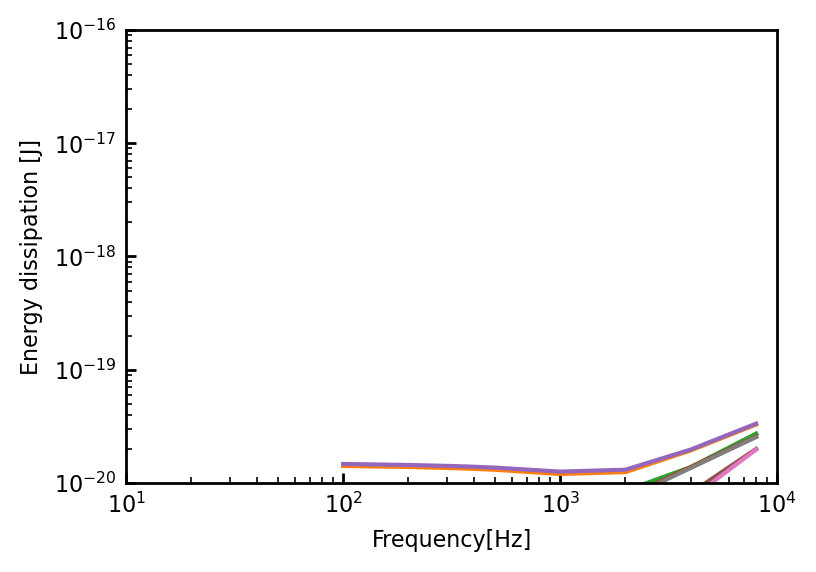

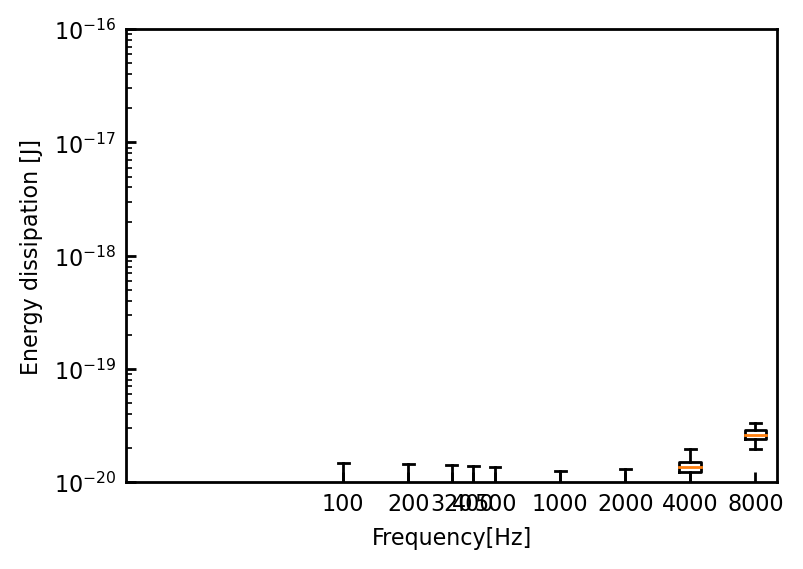

In [3]:
df34 = read_csv("maj5_cm_en2.csv")
df234 = get_energy(df34)
print_original_curve(df234,"maj3 4-bit KSA energy curve")
print_box_plot(df234,"maj3 4-bit KSA energy curve")
#jj number 592

list null contains 0
256
9


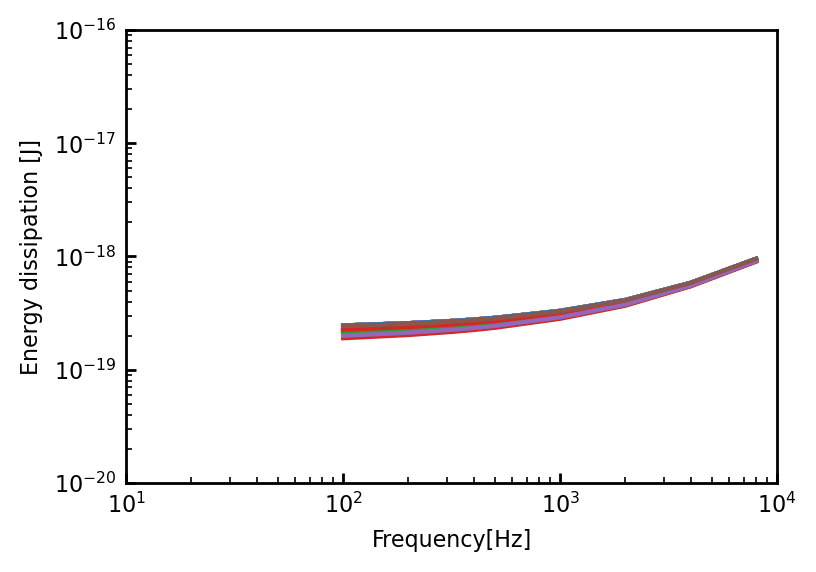

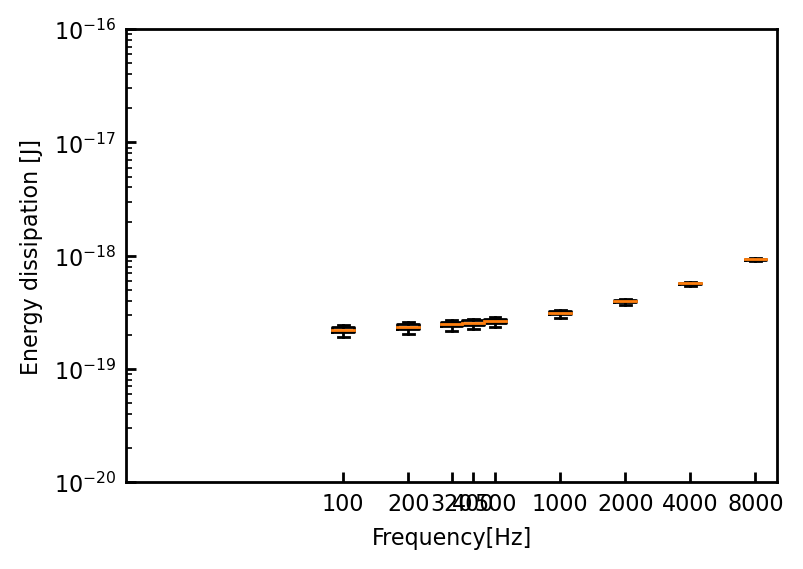

In [4]:
df34 = read_csv("energy_rca4.csv")
df234 = get_energy(df34)
print_original_curve(df234,"RCA4 test")
print_box_plot(df234,"RCA4 tes")
#jj number 592

In [5]:
df34

,input,freq,Total,DUT,diff,Ediss
0,0b00000000,8000,1.071376e-18,8.962565e-19,1.751193e-19,9.414069e-19
1,0b00000000,4000,6.177465e-19,5.369224e-19,8.082406e-20,5.764378e-19
2,0b00000000,2000,4.073531e-19,3.586490e-19,4.870414e-20,4.003894e-19
3,0b00000000,1000,3.108539e-19,2.747695e-19,3.608433e-20,3.171221e-19
4,0b00000000,500,2.607942e-19,2.303869e-19,3.040731e-20,2.737243e-19
...,...,...,...,...,...,...
2299,0b11111111,500,2.648419e-19,2.344260e-19,3.041586e-20,2.830809e-19
2300,0b11111111,400,2.539670e-19,2.246400e-19,2.932704e-20,2.738599e-19
2301,0b11111111,320,2.449412e-19,2.164712e-19,2.846996e-20,2.662194e-19
2302,0b11111111,200,2.306971e-19,2.035028e-19,2.719433e-20,2.538822e-19


In [6]:
df234

,input,freq,Total,DUT,diff,Ediss
0,0b00010010,8000,0.0,0.0,0.0,9.414069e-19
1,0b00010010,4000,0.0,0.0,0.0,5.764378e-19
2,0b00010010,2000,0.0,0.0,0.0,4.003894e-19
3,0b00010010,1000,0.0,0.0,0.0,3.171221e-19
4,0b00010010,500,0.0,0.0,0.0,2.737243e-19
...,...,...,...,...,...,...
2299,0b00001101,500,0.0,0.0,0.0,2.830809e-19
2300,0b00001101,400,0.0,0.0,0.0,2.738599e-19
2301,0b00001101,320,0.0,0.0,0.0,2.662194e-19
2302,0b00001101,200,0.0,0.0,0.0,2.538822e-19


list null contains 0
256
9


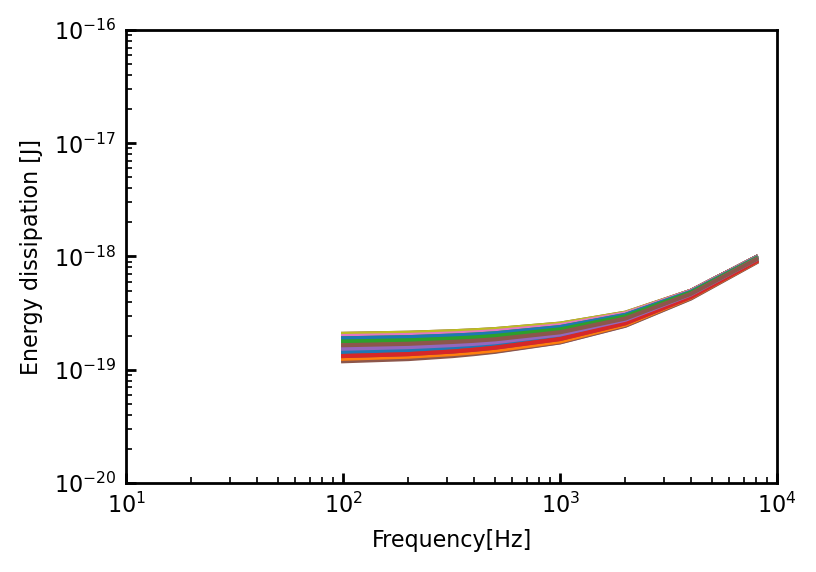

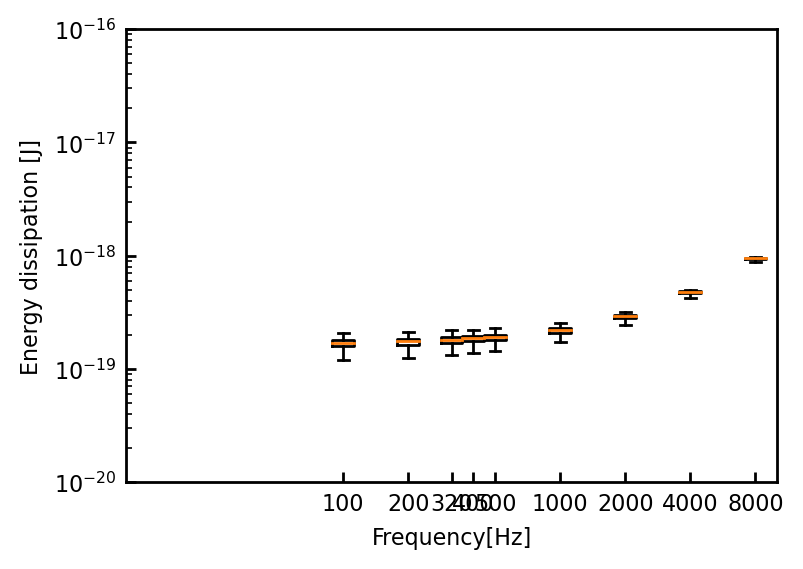

In [7]:
#df34_L = read_csv("energy_josim_v263_04_11_15_11_05.csv")
#df34_L = read_csv("energy_josim_v263_04_26_22_52_44.csv")
df34_eo = read_csv("energy_josim_v263_05_24_15_16_13.csv")
df234_eo = get_energy(df34_eo)
print_original_curve(df234_eo,"maj3 4-bit KSA energy curve")
print_box_plot(df234_eo,"maj3 4-bit KSA energy curve")
#jj number 592

list null contains 0
300
9


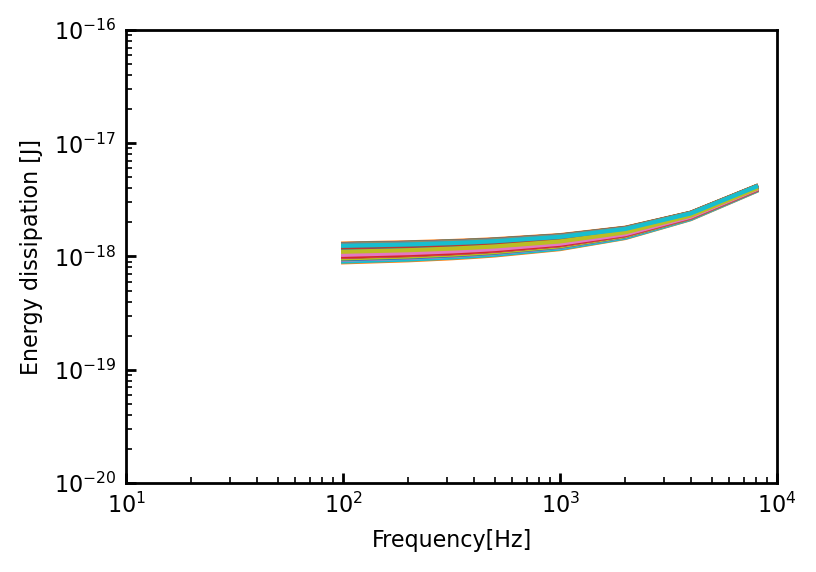

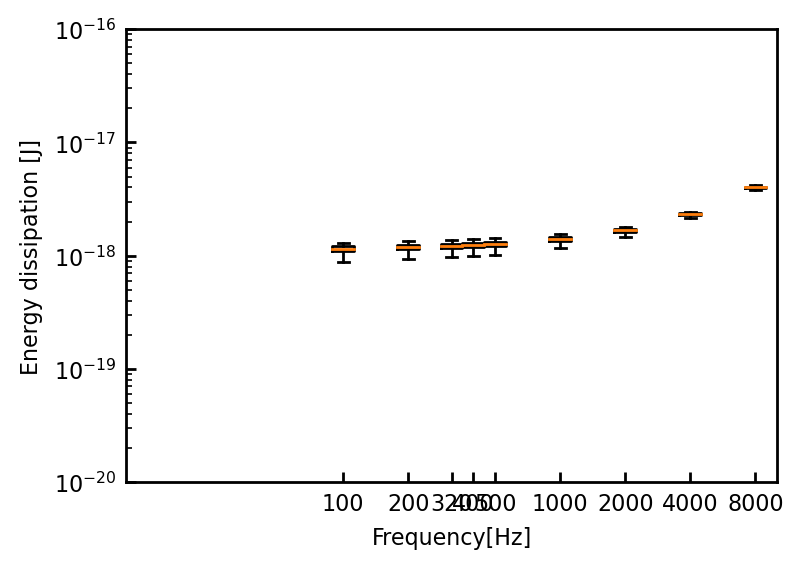

In [8]:
df38 = read_csv("energy_josim_v263_01_27_02_00_23.csv")
df238 = get_energy(df38)
print_original_curve(df238,"maj3 8-bit KSA energy curve")
print_box_plot(df238,"maj3 8-bit KSA energy curve")

list null contains 0
200
9


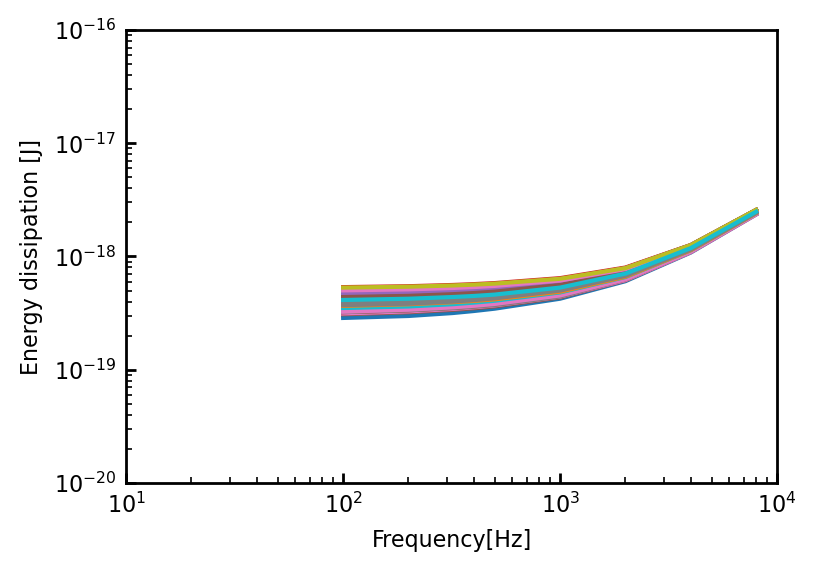

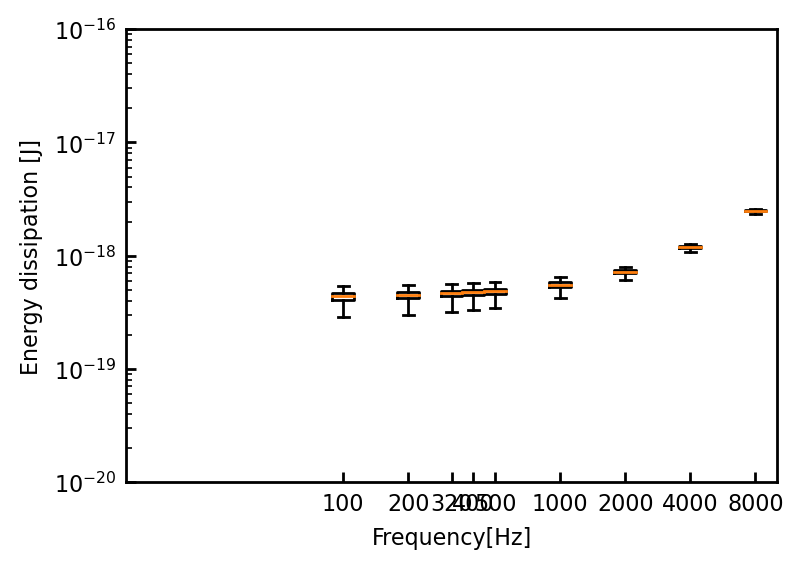

In [9]:
#old one df38_spl2 = read_csv("energy_josim_v263_02_10_17_59_41.csv")
#df38_spl2 = read_csv("energy_josim_v263_03_01_01_01_51.csv")
df38_eo = read_csv("energy_josim_v263_05_29_06_41_02.csv")
df238_eo  = get_energy(df38_eo)
print_original_curve(df238_eo ,"maj3 8-bit_ene_opt KSA energy curve")
print_box_plot(df238_eo ,"maj3 8-bit_ene_opt KSA energy curve")
#print(df38_spl2)

list null contains 0
60
9


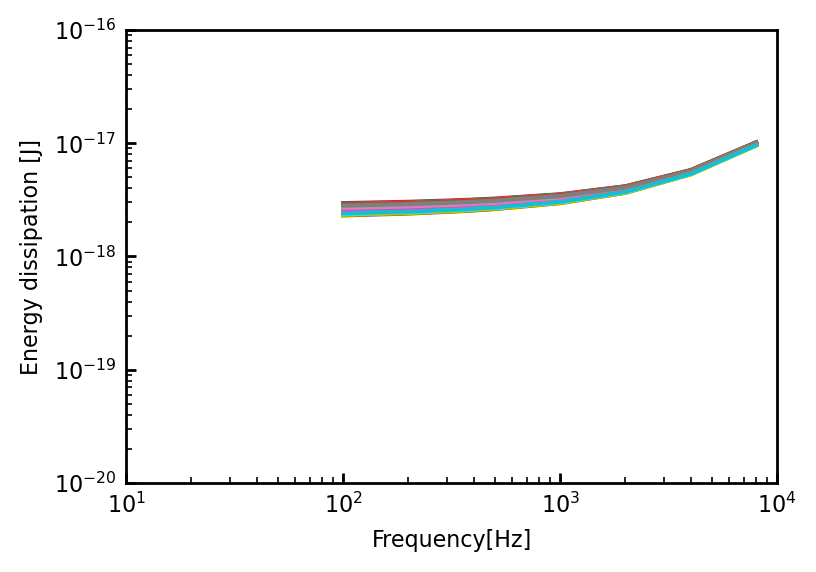

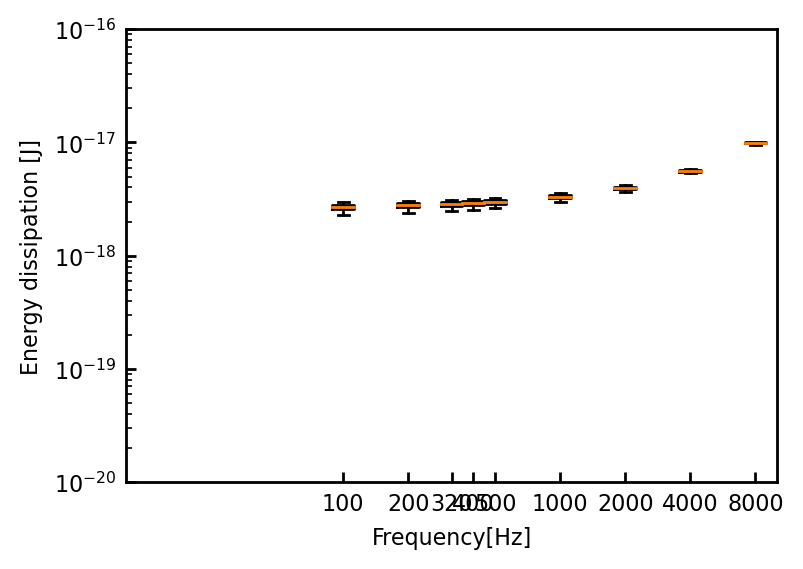

In [10]:
df316 = read_csv("energy_josim_v263_04_16_12_55_23.csv")
df2316  = get_energy(df316)
print_original_curve(df2316 ,"maj3 16-bit KSA energy curve")
print_box_plot(df2316 ,"maj3 16-bit KSA energy curve")


list null contains 0
256
9


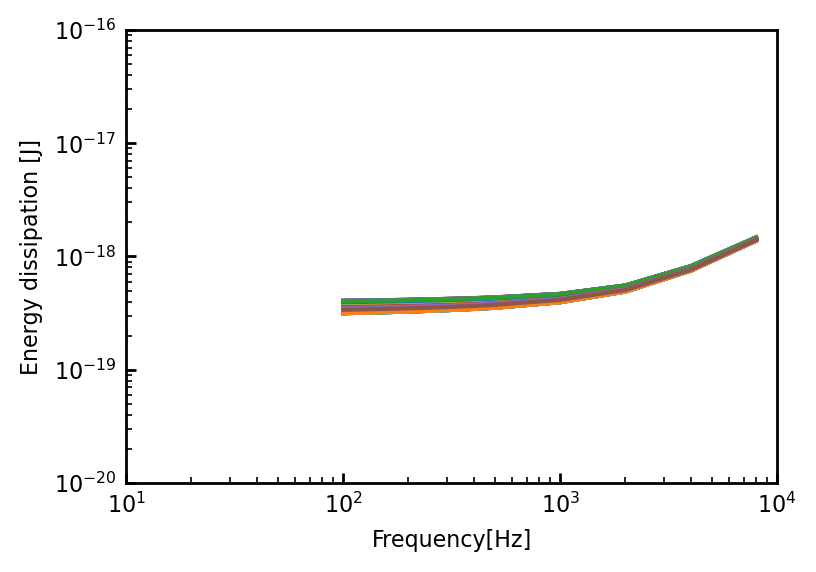

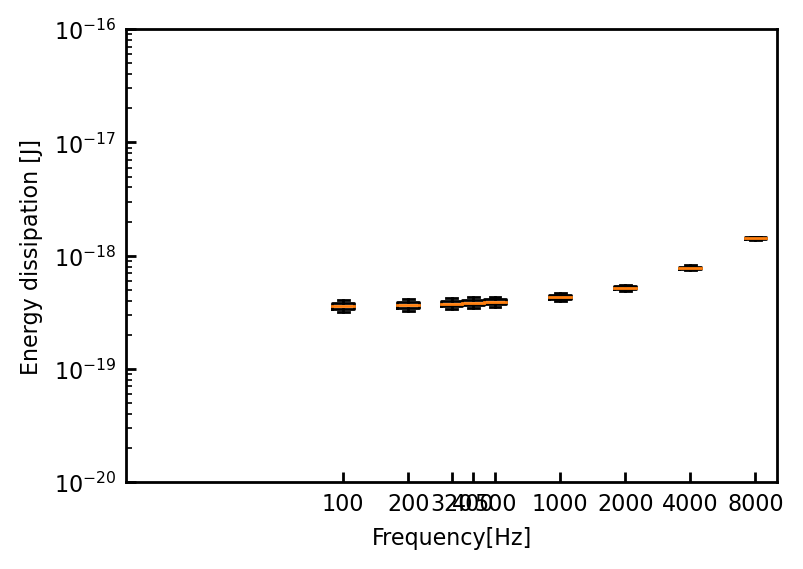

In [11]:
df54 = read_csv("energy_josim_v263_01_27_15_51_42.csv")
df254 = get_energy(df54)
print_original_curve(df254,"maj5 4-bit KSA energy curve")
print_box_plot(df254,"maj5 4-bit KSA energy curve")

list null contains 0
256
9


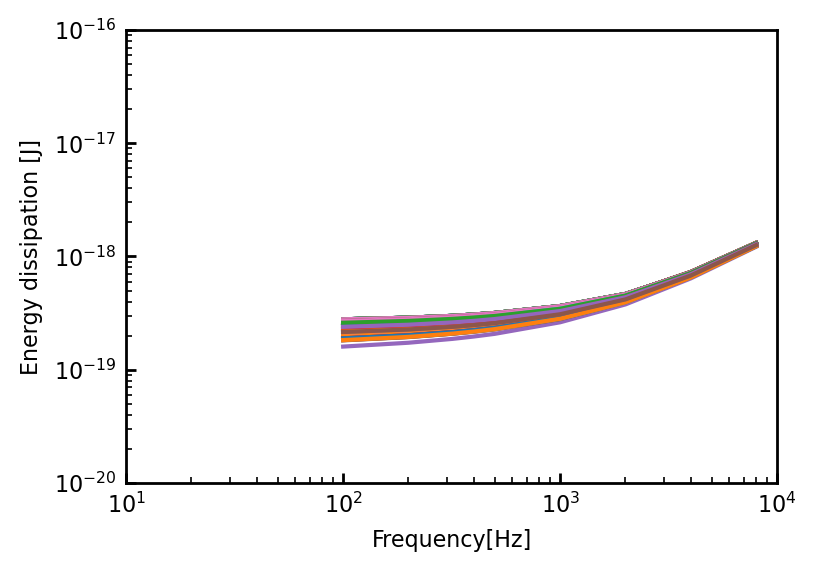

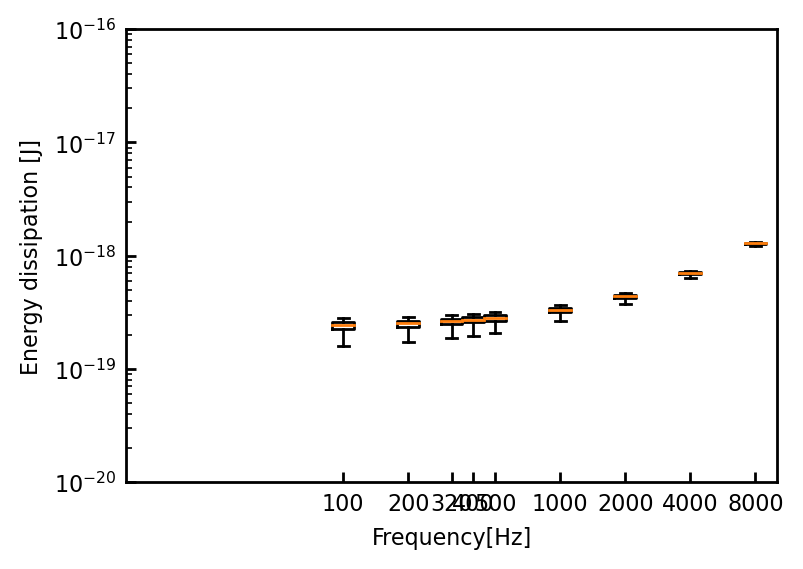

In [12]:
df54_eo = read_csv("energy_josim_v263_06_03_19_53_49.csv")
df254_eo = get_energy(df54_eo)
print_original_curve(df254_eo,"maj5 4-bit KSA ene_opt energy curve")
print_box_plot(df254_eo,"maj5 4-bit KSA ene_opt energy curve")

list null contains 0
300
9


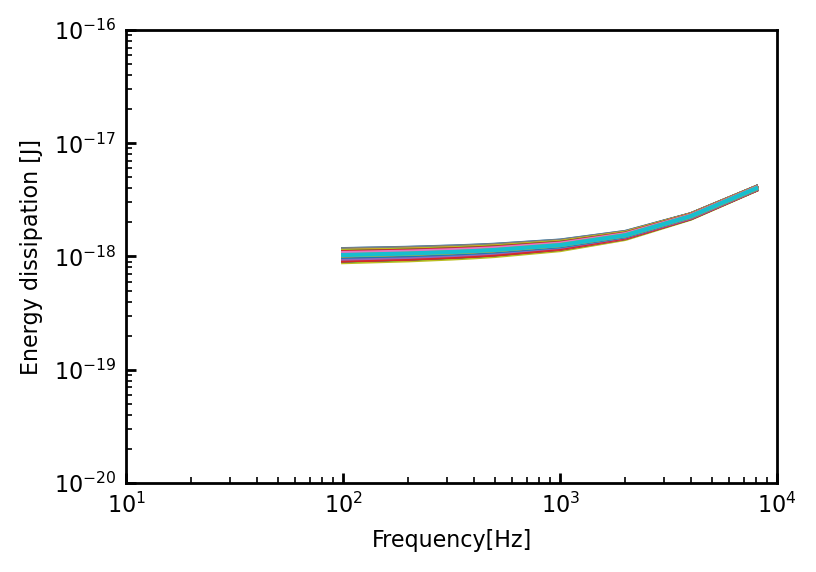

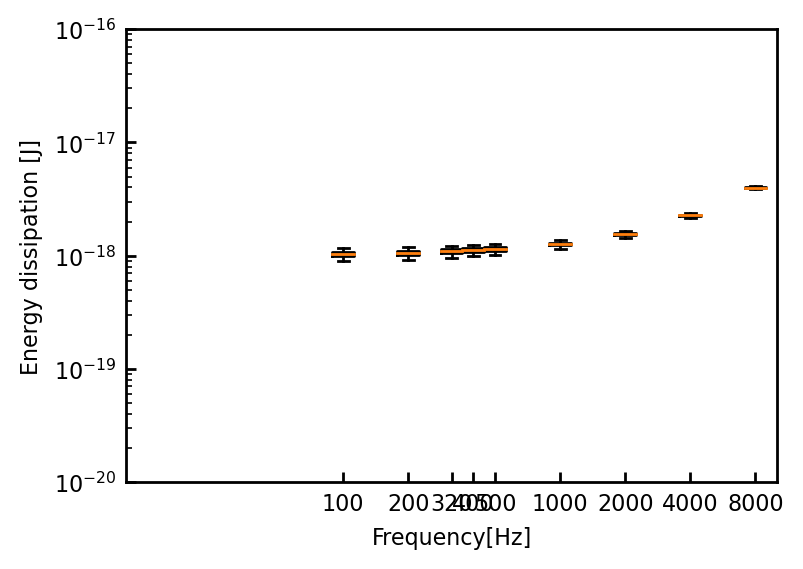

In [13]:
df58 = read_csv("energy_josim_v263_01_26_07_11_23.csv")
df258 = get_energy(df58)
print_original_curve(df258,"maj5 8-bit KSA energy curve")
print_box_plot(df258,"maj5 8-bit KSA energy curve")

list null contains 0
200
9


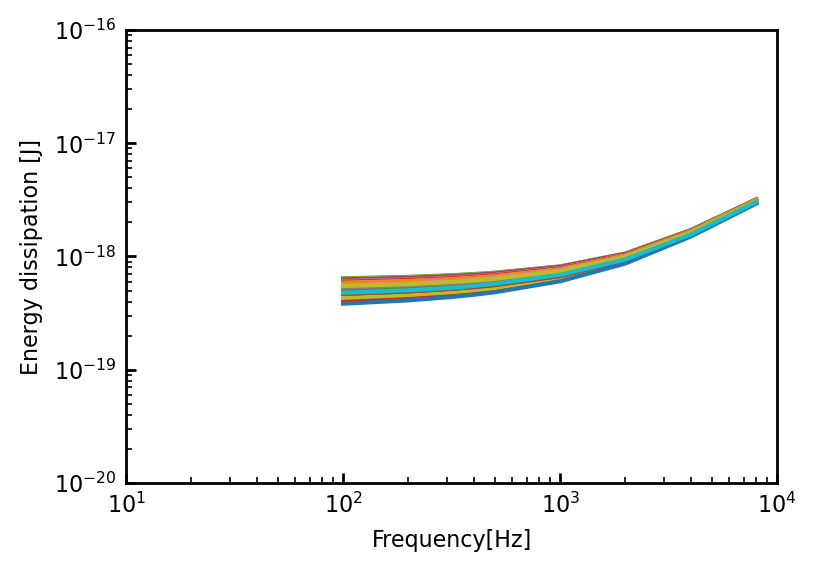

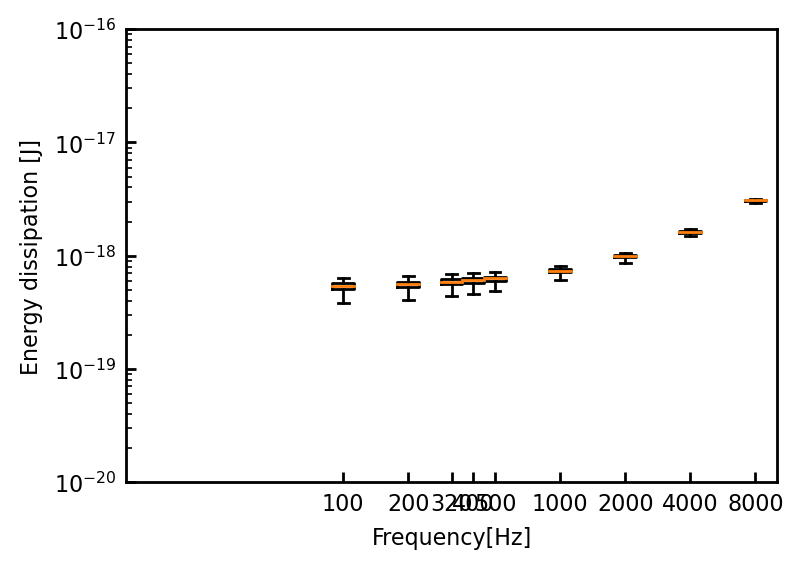

In [14]:
df58_eo = read_csv("energy_josim_v263_05_29_22_43_08.csv")
df258_eo = get_energy(df58_eo)
print_original_curve(df258_eo,"maj5 8-bit ene opt KSA energy curve")
print_box_plot(df258_eo,"maj5 8-bit KSA ene opt energy curve")

list null contains 0
60
9


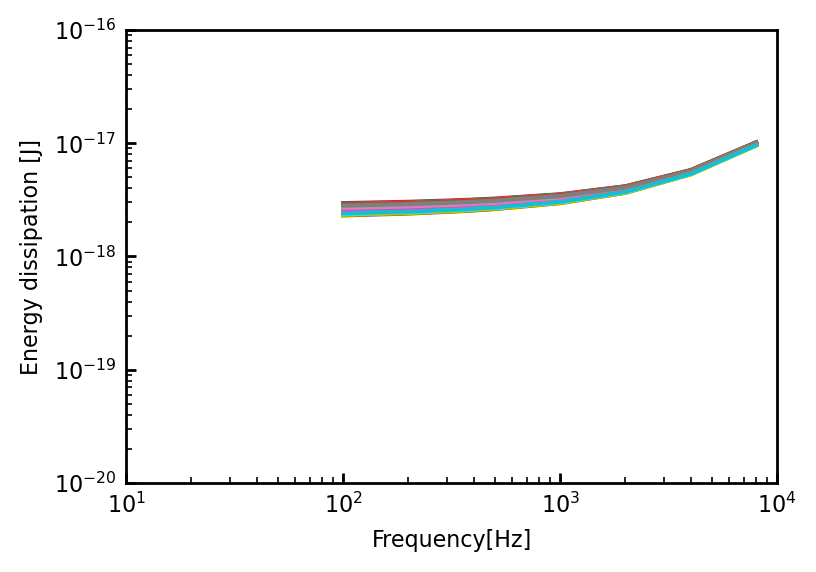

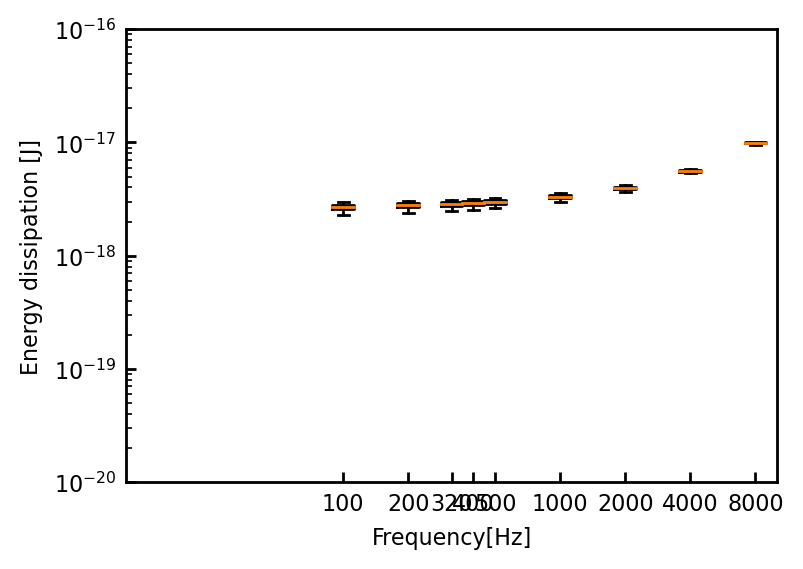

In [15]:
df316 = read_csv("energy_josim_v263_04_16_12_55_23.csv")
df2316 = get_energy(df316)
print_original_curve(df2316,"maj3 16-bit KSA energy curve")
print_box_plot(df2316,"maj3 16-bit KSA energy curve ")

list null contains 0
200
9


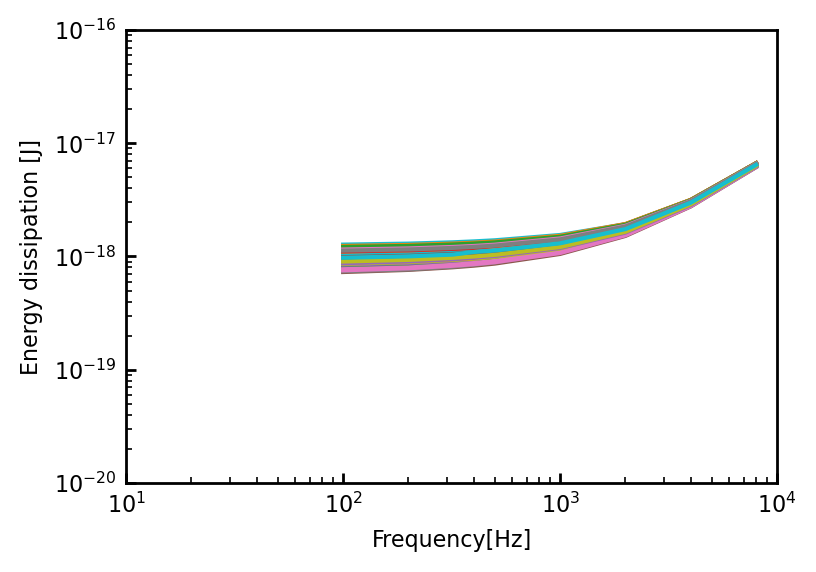

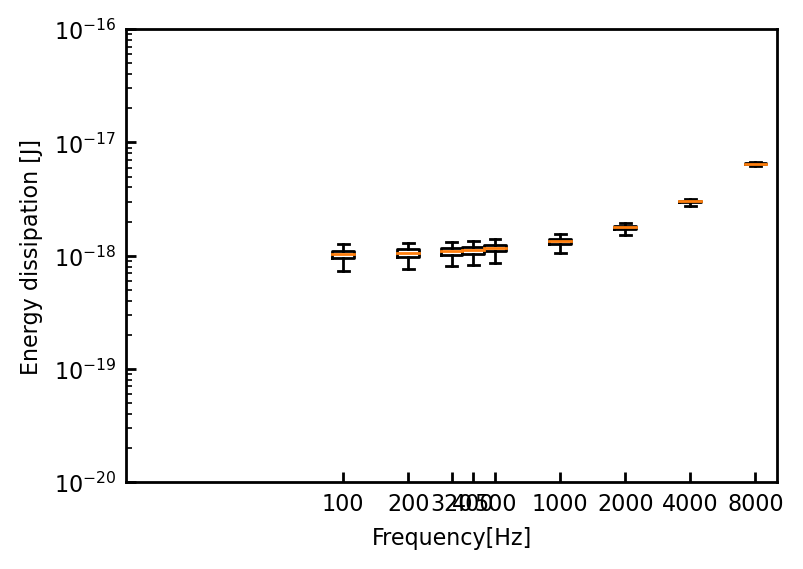

In [16]:
df316_eo = read_csv("energy_josim_v263_05_22_23_38_37.csv")
df2316_eo = get_energy(df316_eo)
print_original_curve(df2316_eo,"maj3 16-bit KSA energy curve")
print_box_plot(df2316_eo,"maj3 16-bit KSA energy curve ")

list null contains 0
200
9


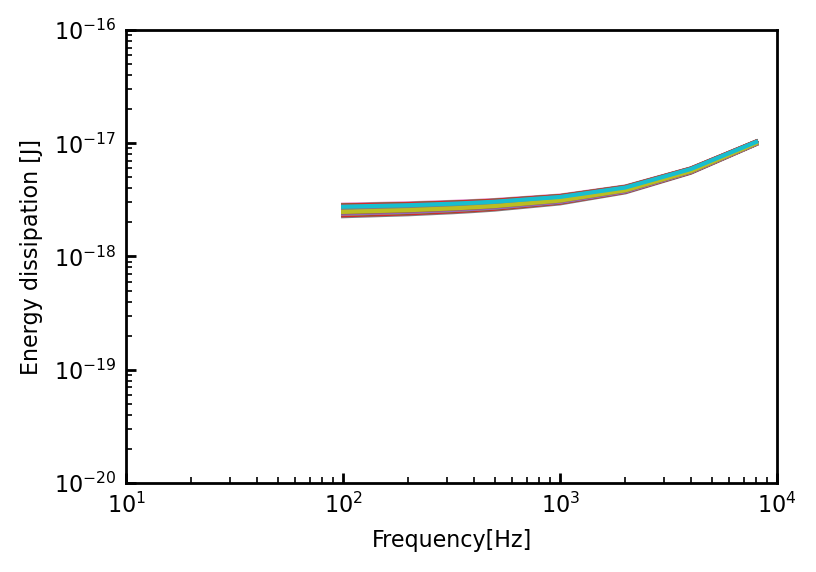

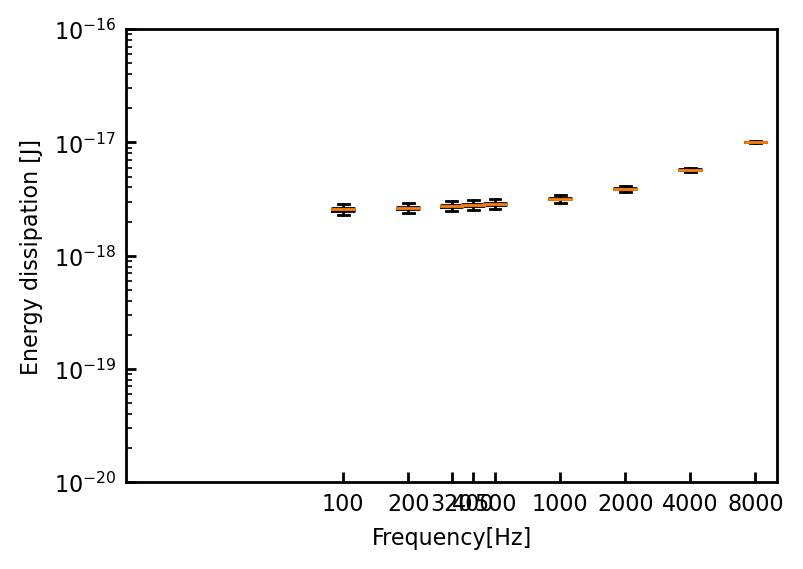

In [17]:

df516 = read_csv("energy_josim_v263_06_03_16_50_14.csv")
df2516 = get_energy(df516)
print_original_curve(df2516,"maj5 16-bit KSA energy curve")
print_box_plot(df2516,"maj5 16-bit KSA energy curve ")

list null contains 0
200
9


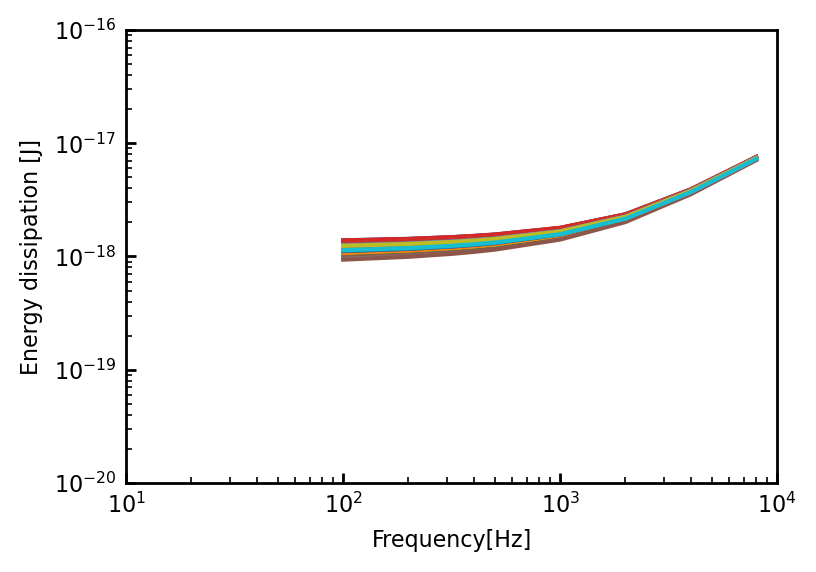

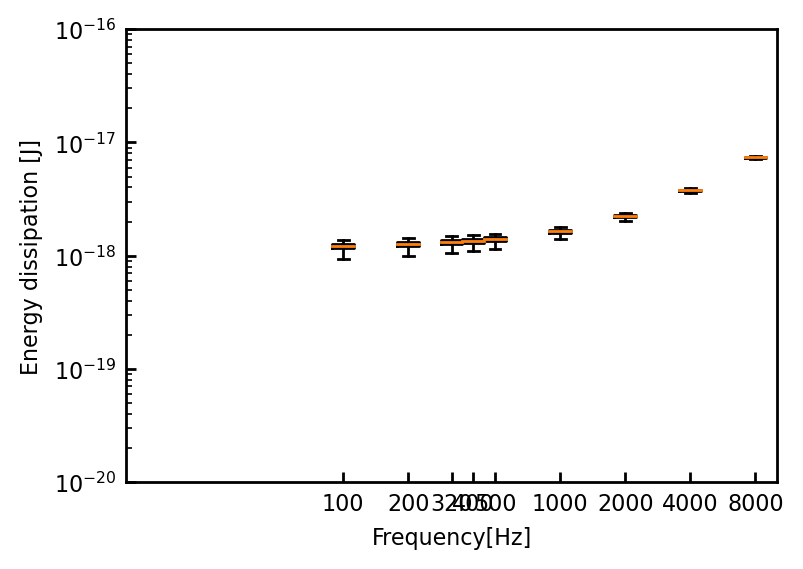

In [18]:
df516_eo = read_csv("energy_josim_v263_05_20_23_45_11.csv")
df2516_eo = get_energy(df516_eo)
print_original_curve(df2516_eo,"maj5 16-bit KSA energy curve")
print_box_plot(df2516_eo,"maj5 16-bit KSA energy curve ")

list null contains 0
256
9


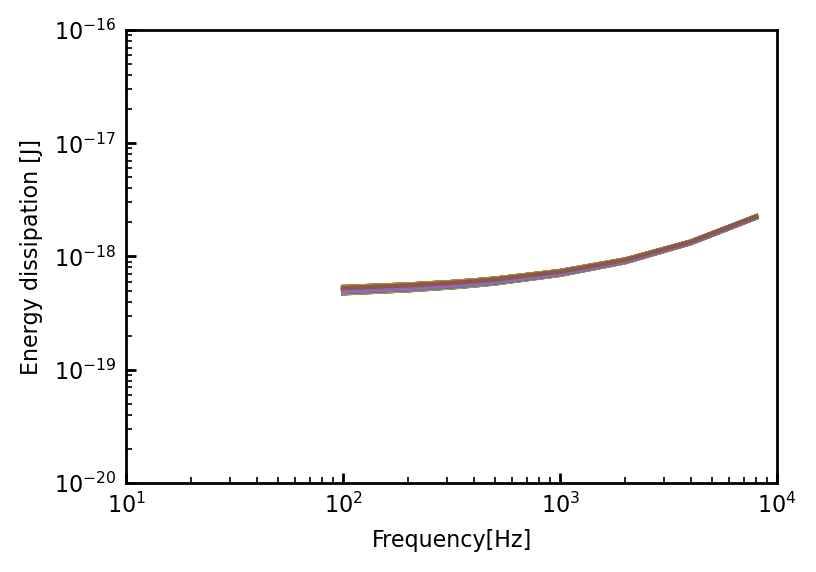

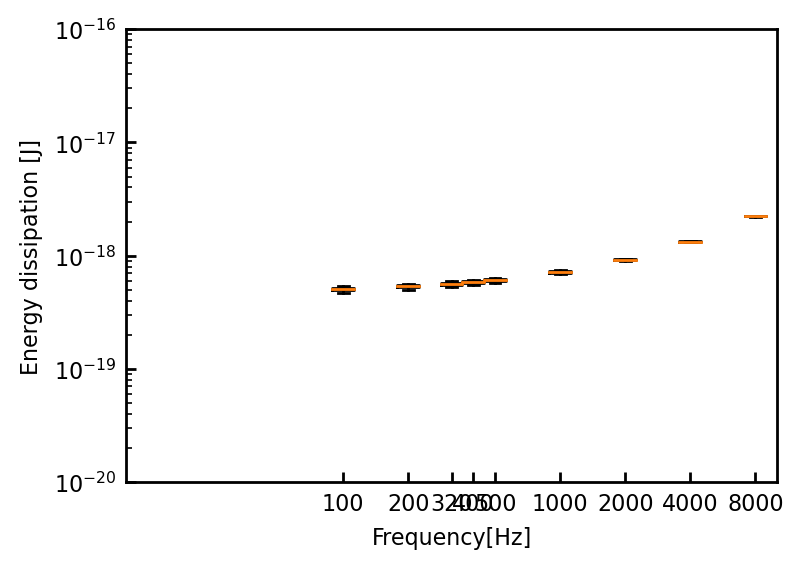

In [19]:
dfr8 = read_csv("energy_josim_v263_08_17_20_32_20.csv")
df2r8 = get_energy(dfr8)
print_original_curve(df2r8,"rca 8-bit KSA energy curve")
print_box_plot(df2r8,"rca 8-bit KSA energy curve ")

list null contains 0
256
9


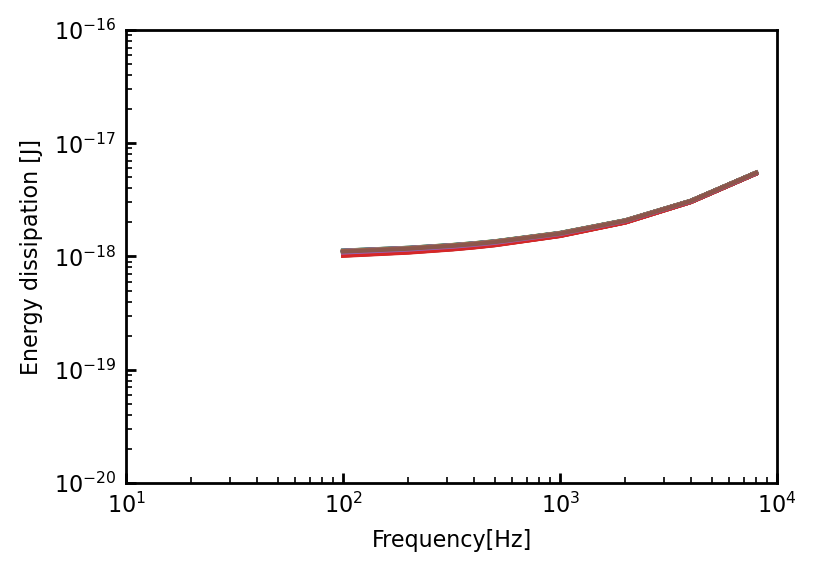

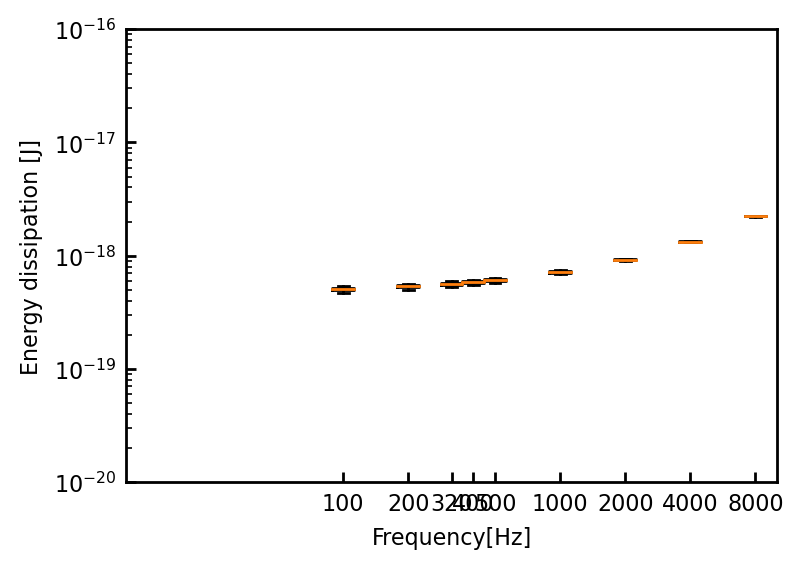

In [20]:
dfr16 = read_csv("energy_josim_v263_08_19_17_08_58.csv")
df2r16 = get_energy(dfr16)
print_original_curve(dfr16,"rca 16-bit KSA energy curve")
print_box_plot(df2r8,"rca 16-bit KSA energy curve ")

list null contains 0
256
9


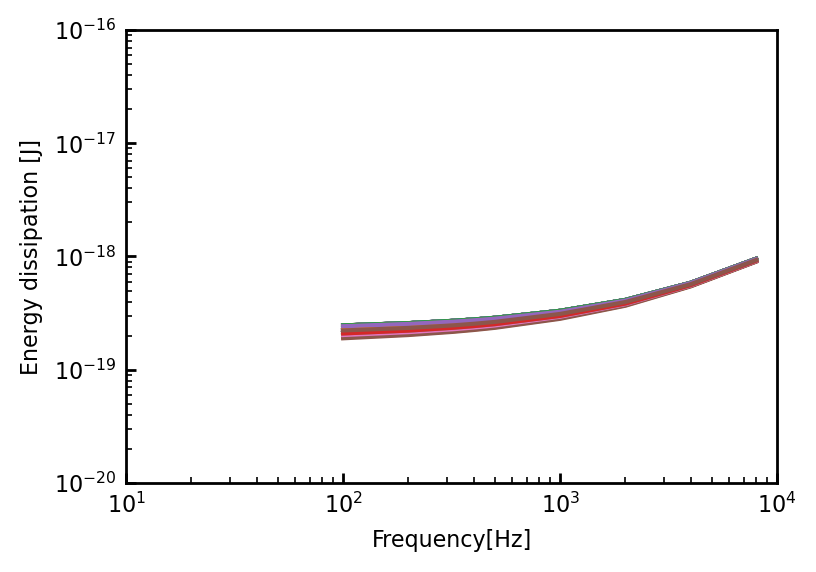

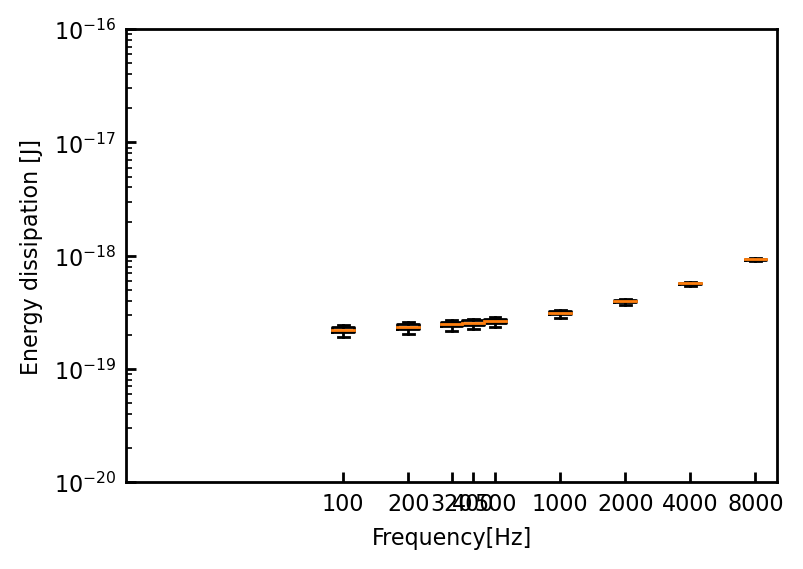

In [21]:
dfr4 = read_csv("energy_josim_v263_08_16_17_54_14.csv")
df2r4 = get_energy(dfr4)
print_original_curve(dfr4,"rca 4-bit KSA energy curve")
print_box_plot(df2r4,"rca 4-bit KSA energy curve ")

[2.2486803051910786e-19, 2.368796861156575e-19, 2.4940957666357924e-19, 2.5737598035469734e-19, 2.670286341075675e-19, 3.121343222870571e-19, 3.961693768340652e-19, 5.706543127209004e-19, 9.332428842752657e-19]
[5.0726452643391175e-19, 5.36300246718096e-19, 5.6663411020798205e-19, 5.8581032357894635e-19, 6.090658912035262e-19, 7.176194828206883e-19, 9.18006396186066e-19, 1.3333638309248884e-18, 2.230445752393111e-18]
[1.0767402512588805e-18, 1.1434451536113425e-18, 1.2138289029310708e-18, 1.2586733094529174e-18, 1.3132080710174736e-18, 1.5689471890430595e-18, 2.0450767717549493e-18, 3.0640293592836483e-18, 5.447743452594126e-18]


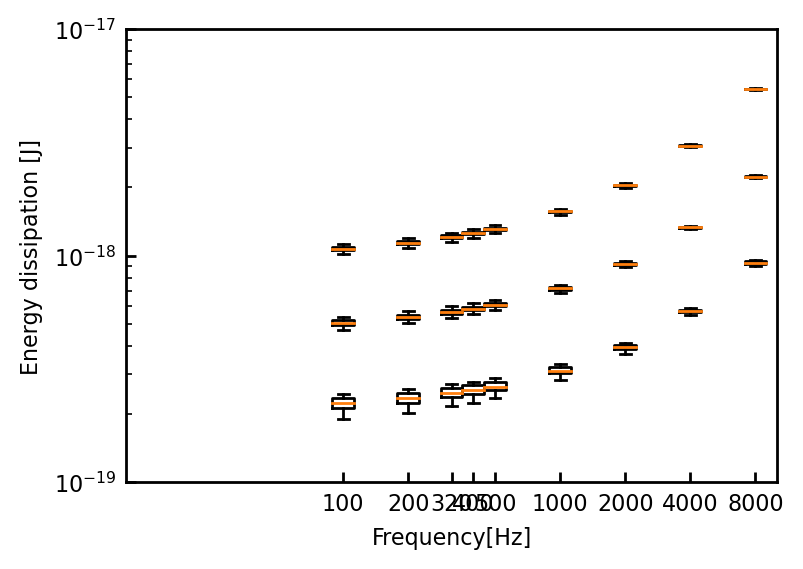

In [22]:
print_box_plot_s([dfr4,dfr8,dfr16],"total")

[3.581187084067315e-19, 3.675337824658316e-19, 3.776665483051617e-19, 3.8387237059819923e-19, 3.914162972460531e-19, 4.2869072569761324e-19, 5.206859825953515e-19, 7.823643455260616e-19, 1.4246268253246606e-18]
[2.4038873114832097e-19, 2.508655100271961e-19, 2.628716661678387e-19, 2.710680149361849e-19, 2.8101034682440915e-19, 3.304078981414877e-19, 4.379925047912619e-19, 6.999118162754563e-19, 1.2845446618458341e-18]


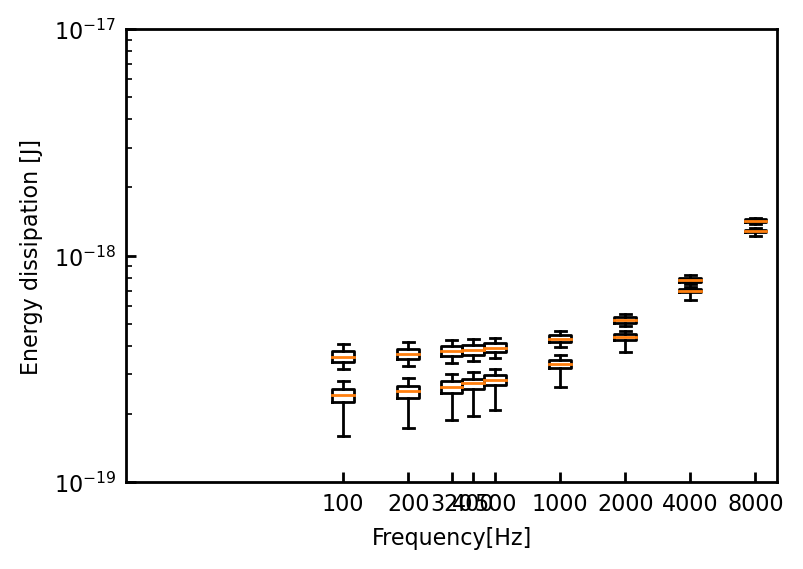

In [23]:
print_box_plot_s([df254,df254_eo],"total")

[1.0322539653500268e-18, 1.0645550101750928e-18, 1.0987284273508074e-18, 1.1196448369405346e-18, 1.1448870472348644e-18, 1.2659361711985333e-18, 1.5438272217946916e-18, 2.2704287008158427e-18, 3.9893806090542886e-18]
[5.3988633105686e-19, 5.621191783481452e-19, 5.880570475727443e-19, 6.056064674428955e-19, 6.269434937270263e-19, 7.353727586478715e-19, 9.862214402503516e-19, 1.6238459635029965e-18, 3.0821721352622457e-18]


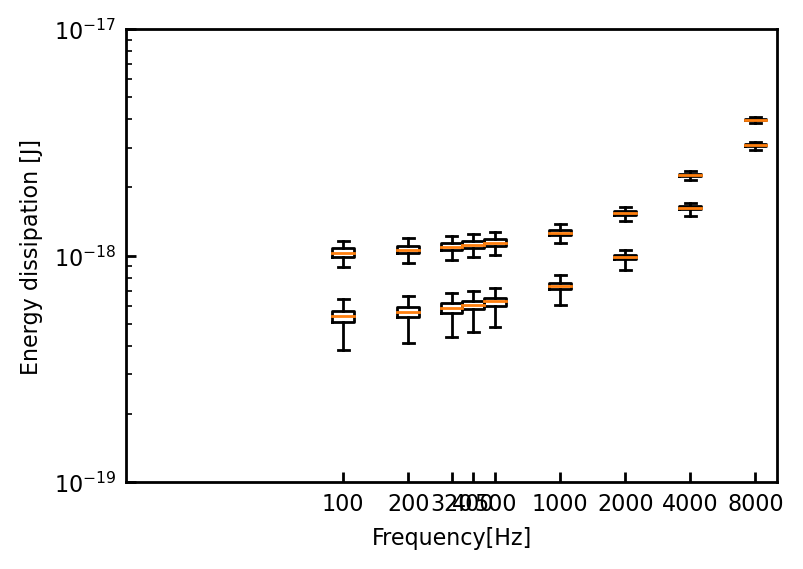

In [24]:
print_box_plot_s([df258,df258_eo],"total")

[2.565306827435731e-18, 2.6519217005532666e-18, 2.7460161960420204e-18, 2.803436666932422e-18, 2.8719600448303683e-18, 3.1975092491736596e-18, 3.917688681866878e-18, 5.7447719004162796e-18, 1.0082212607911489e-17]
[1.214676135650093e-18, 1.2622149484593076e-18, 1.318433241016938e-18, 1.356539127796298e-18, 1.4030343469121562e-18, 1.643208909625008e-18, 2.2231322302232076e-18, 3.763714728758254e-18, 7.361342563077581e-18]


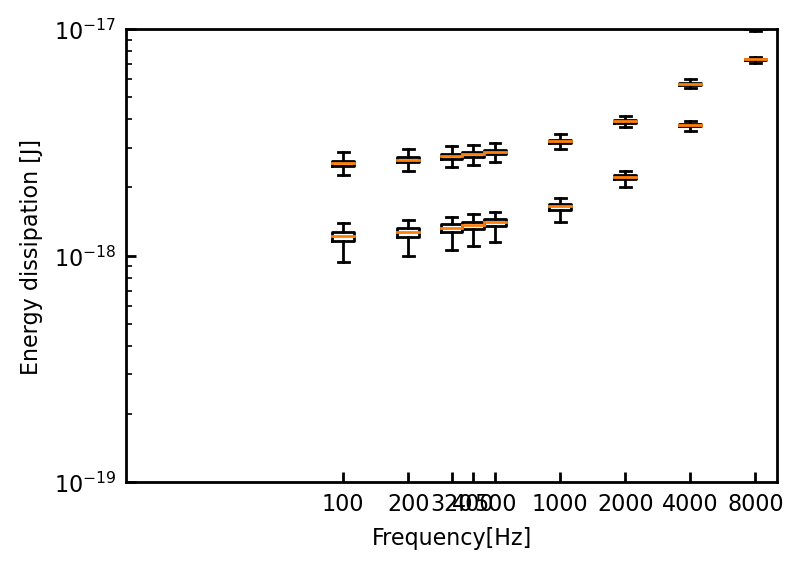

In [25]:
print_box_plot_s([df2516,df2516_eo],"total")

[2.2486803051910786e-19, 2.368796861156575e-19, 2.4940957666357924e-19, 2.5737598035469734e-19, 2.670286341075675e-19, 3.121343222870571e-19, 3.961693768340652e-19, 5.706543127209004e-19, 9.332428842752657e-19]
[1.6832774912038688e-19, 1.731416423840762e-19, 1.7980815501837205e-19, 1.8414597137985288e-19, 1.8982717838686744e-19, 2.1897858109465536e-19, 2.882614466411587e-19, 4.719981597930709e-19, 9.503200325277037e-19]


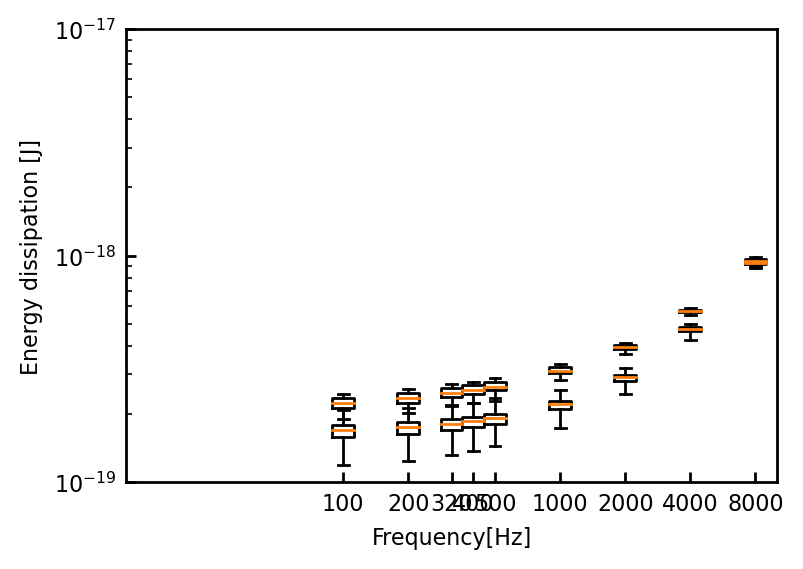

In [26]:
print_box_plot_s([df234,df234_eo],"total")

[1.1446706959961472e-18, 1.17979308606937e-18, 1.2177814812148175e-18, 1.24132182820744e-18, 1.26932823234411e-18, 1.3988341858137734e-18, 1.6661014575202576e-18, 2.323489772665088e-18, 4.016492752011906e-18]
[4.338935917919486e-19, 4.447623923389927e-19, 4.598244148751658e-19, 4.699648665801245e-19, 4.8309700794173725e-19, 5.505412060992208e-19, 7.183363070820713e-19, 1.1926992555822823e-18, 2.489334731246587e-18]


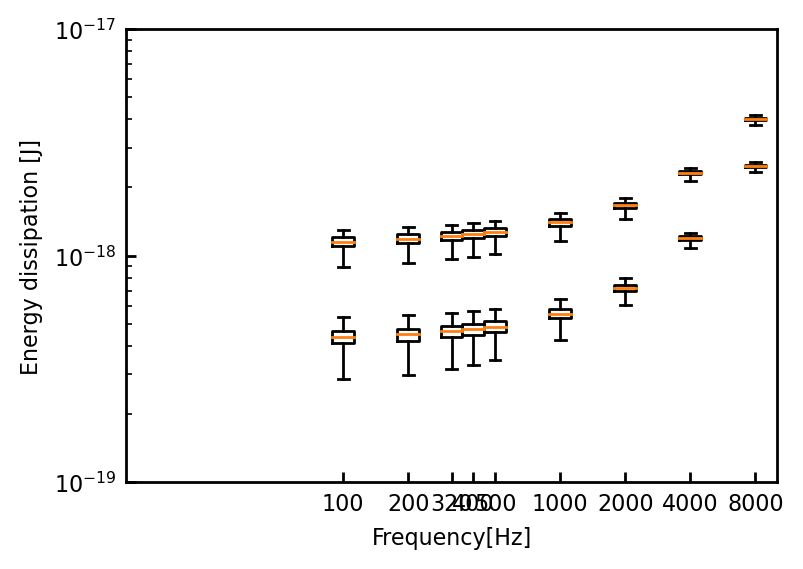

In [27]:
print_box_plot_s([df238,df238_eo],"total")

[2.6797123948769856e-18, 2.7637660481872833e-18, 2.8549603890196373e-18, 2.9114682663257672e-18, 2.978964864540177e-18, 3.295285199506389e-18, 3.952146058918377e-18, 5.595038588004156e-18, 9.920409422962647e-18]
[1.0269822023315768e-18, 1.0541446217712226e-18, 1.0917135061111915e-18, 1.1180988658594217e-18, 1.1602026404471155e-18, 1.337235350921221e-18, 1.771513827459921e-18, 3.0075441637375076e-18, 6.463448476402599e-18]


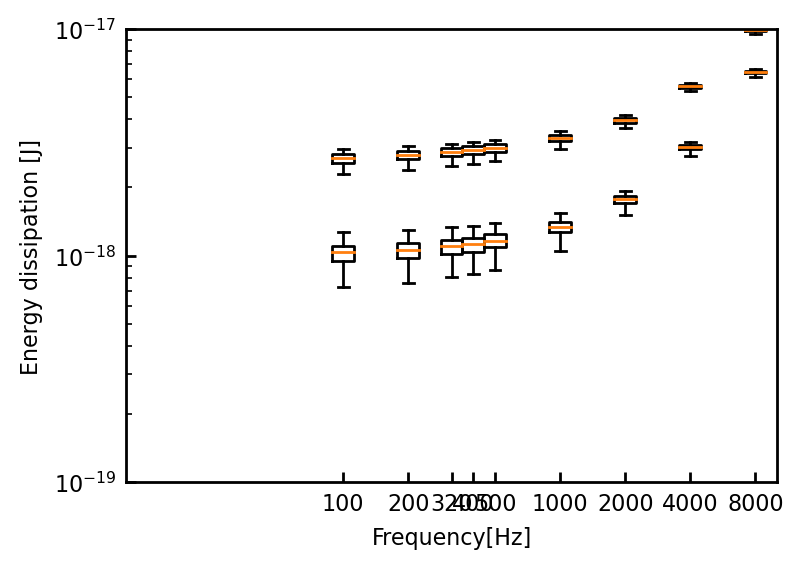

In [28]:
print_box_plot_s([df2316,df2316_eo],"total")

[1.6832774912038688e-19, 1.7314164238407617e-19, 1.7980815501837205e-19, 1.8414597137985288e-19, 1.8982717838686744e-19, 2.1897858109465536e-19, 2.882614466411587e-19, 4.719981597930709e-19, 9.503200325277037e-19]
[100, 200, 320, 400, 500, 1000, 2000, 4000, 8000]
[4.338935917919486e-19, 4.447623923389926e-19, 4.598244148751658e-19, 4.699648665801246e-19, 4.8309700794173725e-19, 5.5054120609922085e-19, 7.183363070820714e-19, 1.1926992555822823e-18, 2.489334731246587e-18]
[100, 200, 320, 400, 500, 1000, 2000, 4000, 8000]
[1.0269822023315768e-18, 1.0541446217712226e-18, 1.0917135061111913e-18, 1.1180988658594217e-18, 1.1602026404471155e-18, 1.3372353509212213e-18, 1.771513827459921e-18, 3.0075441637375076e-18, 6.4634484764026e-18]
[100, 200, 320, 400, 500, 1000, 2000, 4000, 8000]


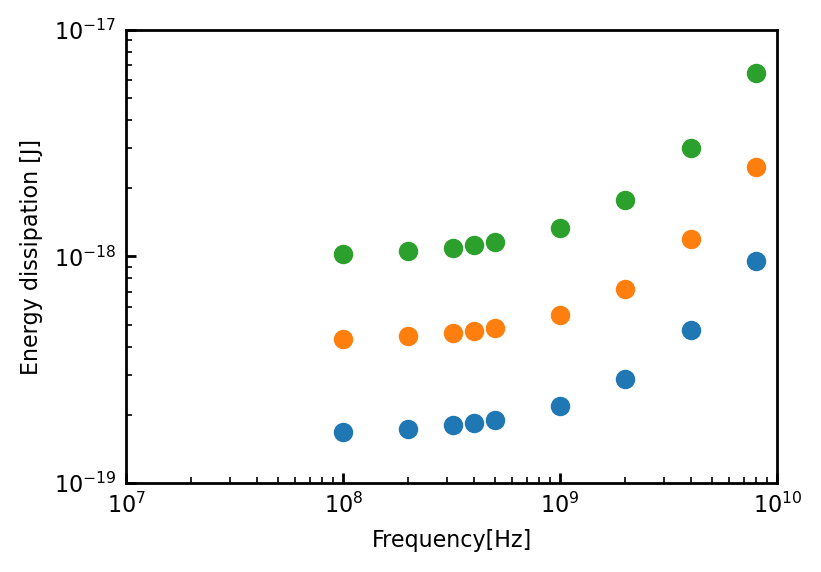

In [29]:
def print_box_plot_s2(dfs,title:str):
    plt.figure(figsize=(4.2,3),dpi = 200)
    for df in dfs:
        input_list=set(df["freq"])
        input_list = list(set(df["freq"]))
        input_list.sort()
        enes = [np.mean(list(df[df["freq"]==item]["Ediss"]))for item in input_list]
        plt.scatter(np.array(input_list)*10**6,enes)
        #plt.boxplot(enes,positions=[2,2.3,2.5,2.6,2.7,3,3.3,3.6,3.9],whis=(0,100),widths=0.1)
        #plt.xticks([2,2.3,2.5,2.6,2.7,3,3.3,3.6,3.9], [100,200,320,400,500,1000,2000,4000,8000])
        
        #print([statistics.mean(item) for item in enes])
        print(enes)
        print(input_list)
    plt.yscale("log")
    plt.ylim(1E-19,1E-17)
    plt.xlim(10**7,10**10)
    plt.xscale("log")
    plt.xlabel("Frequency[Hz]")
    plt.ylabel("Energy dissipation [J]")
    #plt.title(title)
    plt.savefig("total_curve.pdf")
    

print_box_plot_s2([df234_eo,df238_eo,df2316_eo],"total")

[2.403887311483209e-19, 2.508655100271961e-19, 2.628716661678387e-19, 2.710680149361849e-19, 2.8101034682440915e-19, 3.304078981414877e-19, 4.37992504791262e-19, 6.999118162754562e-19, 1.2845446618458341e-18]
[100, 200, 320, 400, 500, 1000, 2000, 4000, 8000]
[5.3988633105686e-19, 5.621191783481451e-19, 5.880570475727443e-19, 6.056064674428956e-19, 6.269434937270264e-19, 7.353727586478715e-19, 9.862214402503516e-19, 1.6238459635029965e-18, 3.0821721352622457e-18]
[100, 200, 320, 400, 500, 1000, 2000, 4000, 8000]
[1.2146761356500932e-18, 1.2622149484593078e-18, 1.318433241016938e-18, 1.3565391277962978e-18, 1.4030343469121564e-18, 1.6432089096250079e-18, 2.2231322302232076e-18, 3.763714728758254e-18, 7.361342563077581e-18]
[100, 200, 320, 400, 500, 1000, 2000, 4000, 8000]


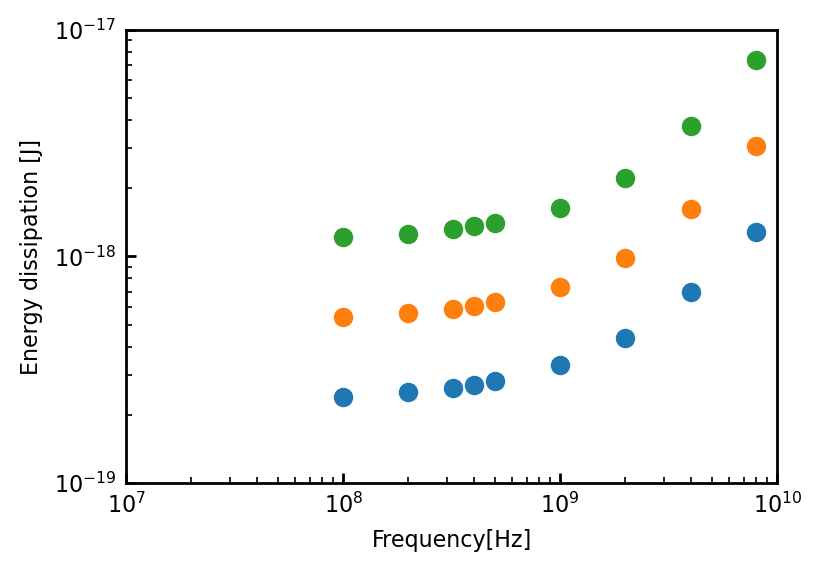

In [30]:
print_box_plot_s2([df254_eo,df258_eo,df2516_eo],"total")

[2.4038873114832097e-19, 2.508655100271961e-19, 2.628716661678387e-19, 2.710680149361849e-19, 2.8101034682440915e-19, 3.304078981414877e-19, 4.379925047912619e-19, 6.999118162754563e-19, 1.2845446618458341e-18]
[1.6832774912038688e-19, 1.731416423840762e-19, 1.7980815501837205e-19, 1.8414597137985288e-19, 1.8982717838686744e-19, 2.1897858109465536e-19, 2.882614466411587e-19, 4.719981597930709e-19, 9.503200325277037e-19]


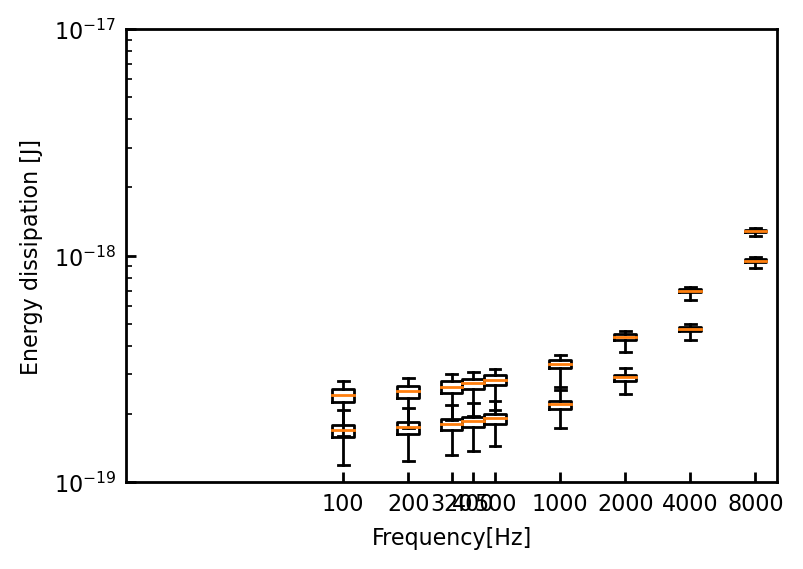

In [31]:
print_box_plot_s([df254_eo,df234_eo],"total")

[5.3988633105686e-19, 5.621191783481452e-19, 5.880570475727443e-19, 6.056064674428955e-19, 6.269434937270263e-19, 7.353727586478715e-19, 9.862214402503516e-19, 1.6238459635029965e-18, 3.0821721352622457e-18]
[4.338935917919486e-19, 4.447623923389927e-19, 4.598244148751658e-19, 4.699648665801245e-19, 4.8309700794173725e-19, 5.505412060992208e-19, 7.183363070820713e-19, 1.1926992555822823e-18, 2.489334731246587e-18]


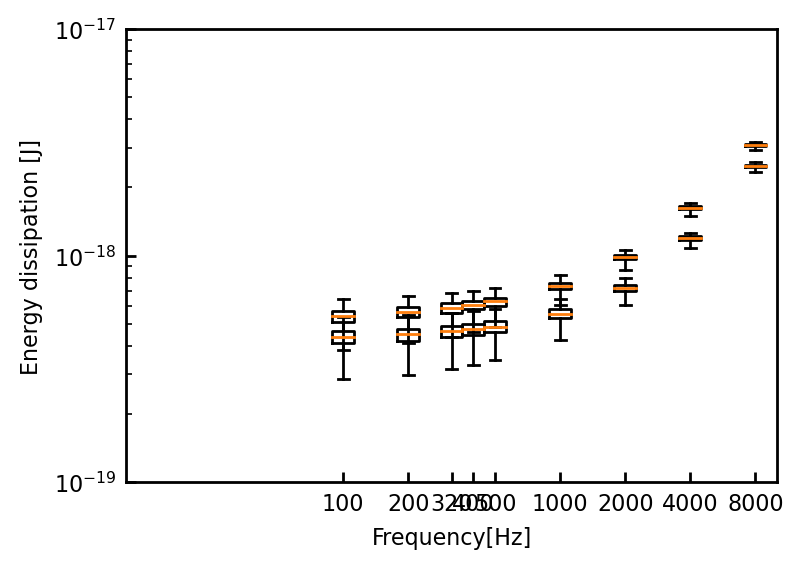

In [32]:
print_box_plot_s([df258_eo,df238_eo],"total")

[1.214676135650093e-18, 1.2622149484593076e-18, 1.318433241016938e-18, 1.356539127796298e-18, 1.4030343469121562e-18, 1.643208909625008e-18, 2.2231322302232076e-18, 3.763714728758254e-18, 7.361342563077581e-18]
[1.0269822023315768e-18, 1.0541446217712226e-18, 1.0917135061111915e-18, 1.1180988658594217e-18, 1.1602026404471155e-18, 1.337235350921221e-18, 1.771513827459921e-18, 3.0075441637375076e-18, 6.463448476402599e-18]


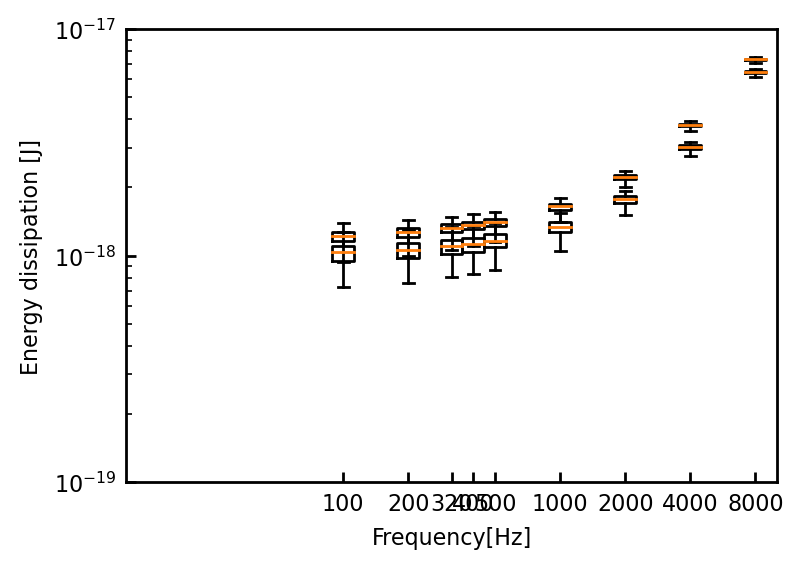

In [33]:
print_box_plot_s([df2516_eo,df2316_eo],"total")

In [34]:
freqs = np.array(sorted(list(set(df258["freq"]))))*10**6

<Figure size 648x432 with 0 Axes>

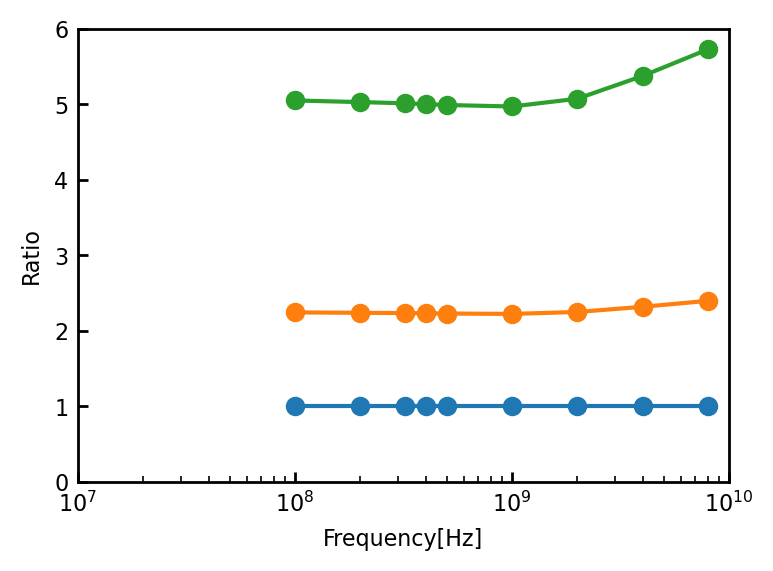

In [35]:
#majority energy optimization
maj54=[2.4038873114832088e-19, 2.50865510027196e-19, 2.6287166616783864e-19, 2.7106801493618483e-19, 2.8101034682440905e-19, 3.304078981414876e-19, 4.379925047912618e-19, 6.999118162754562e-19, 1.284544661845834e-18]
maj58=[5.398863310568598e-19, 5.62119178348145e-19, 5.880570475727441e-19, 6.056064674428953e-19, 6.269434937270261e-19, 7.353727586478713e-19, 9.862214402503514e-19, 1.6238459635029963e-18, 3.0821721352622453e-18]
maj516=[1.2146761356500926e-18, 1.2622149484593072e-18, 1.3184332410169375e-18, 1.3565391277962976e-18, 1.4030343469121558e-18, 1.6432089096250077e-18, 2.2231322302232072e-18, 3.763714728758254e-18, 7.36134256307758e-18]
maj54_vs4 = np.array(maj54)/np.array(maj54)
maj58_vs4 = np.array(maj58)/np.array(maj54)
maj516_vs4 = np.array(maj516)/np.array(maj54)
fig = plt.figure(figsize=(9,6))
plt.figure(figsize=(4.2,3),dpi = 200)
plt.scatter(freqs,maj54_vs4,label = "4-bit rate")
plt.scatter(freqs,maj58_vs4,label = "8-bit rate")
plt.scatter(freqs,maj516_vs4,label = "16-bit rate")

plt.plot(freqs,maj54_vs4)
plt.plot(freqs,maj58_vs4)
plt.plot(freqs,maj516_vs4)
plt.xlabel("Frequency[Hz]")
plt.ylabel("Ratio")
plt.ylim(0,6)
plt.xlim(10**7,10**10)
plt.xscale("log")

plt.savefig("saved_fig_maj3.pdf")

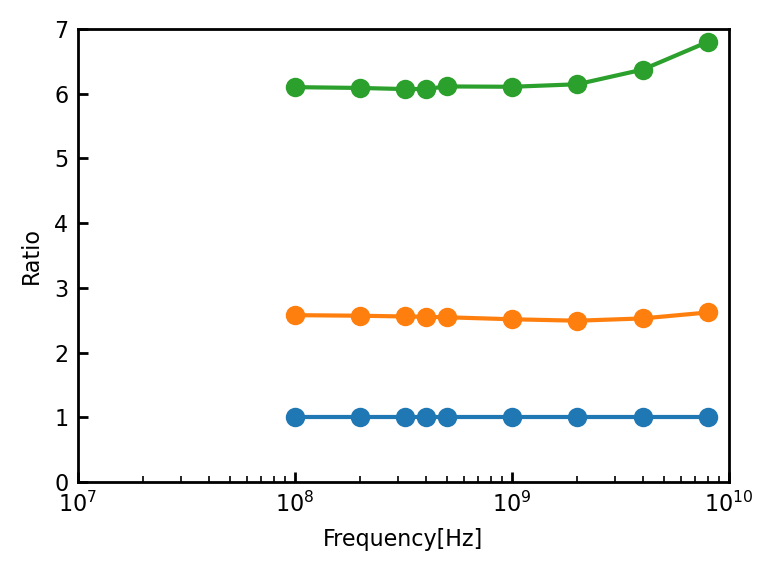

In [36]:
#majority energy optimization
maj34=[1.6832774912038683e-19, 1.7314164238407612e-19, 1.79808155018372e-19, 1.8414597137985283e-19, 1.8982717838686737e-19, 2.189785810946553e-19, 2.8826144664115867e-19, 4.719981597930708e-19, 9.503200325277035e-19]
maj38=[4.338935917919485e-19, 4.4476239233899255e-19, 4.598244148751657e-19, 4.699648665801244e-19, 4.830970079417371e-19, 5.505412060992207e-19, 7.183363070820711e-19, 1.1926992555822821e-18, 2.4893347312465868e-18]
maj316=[1.0269822023315766e-18, 1.0541446217712224e-18, 1.0917135061111913e-18, 1.1180988658594215e-18, 1.1602026404471153e-18, 1.3372353509212207e-18, 1.7715138274599205e-18, 3.0075441637375072e-18, 6.463448476402598e-18]
maj34_vs4 = np.array(maj34)/np.array(maj34)
maj38_vs4 = np.array(maj38)/np.array(maj34)
maj316_vs4 = np.array(maj316)/np.array(maj34)
plt.figure(figsize=(4.2,3),dpi = 200)
plt.scatter(freqs,maj34_vs4,label = "4-bit rate")
plt.scatter(freqs,maj38_vs4,label = "8-bit rate")
plt.scatter(freqs,maj316_vs4,label = "16-bit rate")

plt.plot(freqs,maj34_vs4)
plt.plot(freqs,maj38_vs4)
plt.plot(freqs,maj316_vs4)
plt.xlabel("Frequency[Hz]")
plt.ylabel("Ratio")
plt.ylim(0,7)
plt.xlim(10**7,10**10)
plt.xscale("log")
plt.savefig("saved_fig_maj5.pdf")

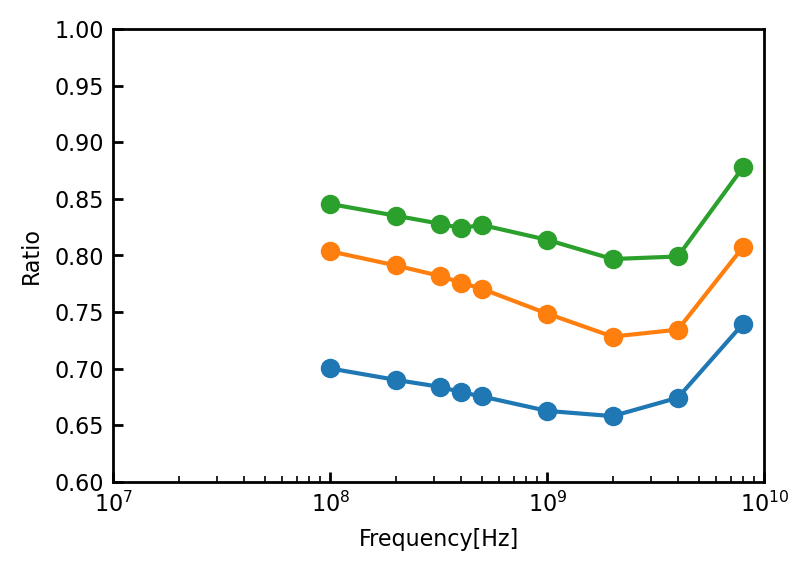

In [37]:
maj34_vsmaj54 = np.array(maj34)/np.array(maj54)
maj38_vsmaj58 = np.array(maj38)/np.array(maj58)
maj316_vsmaj516 = np.array(maj316)/np.array(maj516)
plt.figure(figsize=(4.2,3),dpi = 200)
plt.scatter(freqs,maj34_vsmaj54,label = "4-bit")
plt.scatter(freqs,maj38_vsmaj58,label = "8-bit")
plt.scatter(freqs,maj316_vsmaj516,label = "16-bit")

plt.plot(freqs,maj34_vsmaj54)
plt.plot(freqs,maj38_vsmaj58)
plt.plot(freqs,maj316_vsmaj516)
plt.ylim(0.6,1)
plt.xlabel("Frequency[Hz]")
plt.ylabel("Ratio")
plt.xlim(10**7,10**10)
plt.xscale("log")

plt.savefig("maj3_maj5.pdf")

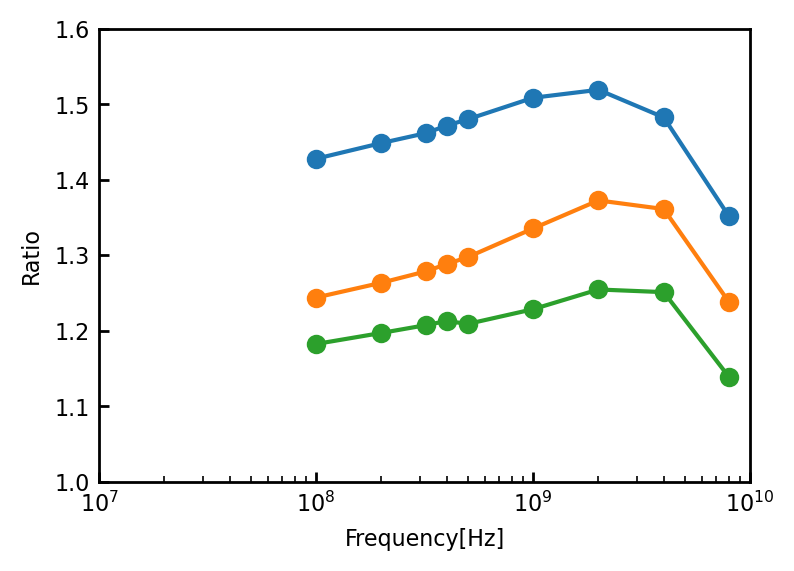

In [38]:
maj34_vsmaj54 = np.array(maj54)/np.array(maj34)
maj38_vsmaj58 = np.array(maj58)/np.array(maj38)
maj316_vsmaj516 = np.array(maj516)/np.array(maj316)
plt.figure(figsize=(4.2,3),dpi = 200)
plt.scatter(freqs,maj34_vsmaj54,label = "4-bit")
plt.scatter(freqs,maj38_vsmaj58,label = "8-bit")
plt.scatter(freqs,maj316_vsmaj516,label = "16-bit")

plt.plot(freqs,maj34_vsmaj54)
plt.plot(freqs,maj38_vsmaj58)
plt.plot(freqs,maj316_vsmaj516)
plt.ylim(1,1.6)
plt.xlabel("Frequency[Hz]")
plt.ylabel("Ratio")
plt.xlim(10**7,10**10)

plt.xscale("log")

plt.savefig("maj5_maj3.pdf")

In [39]:
maj5_scale_factor = np.array(adder58)/np.array(adder54)
maj3_scale_factor = np.array(adder38)/np.array(adder34)
bit_4_factor = np.array(adder54)/np.array(adder34)
bit_8_factor = np.array(adder58)/np.array(adder38)
scale_factor_overhead = maj5_scale_factor/maj3_scale_factor

NameError: name 'adder58' is not defined

In [ ]:
freqs = sorted(list(set(df258["freq"])))

In [ ]:
scale_factor_overhead

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.scatter(freqs,maj3_scale_factor,label = "maj3")
plt.plot(freqs,maj3_scale_factor)
plt.scatter(freqs,maj5_scale_factor,label = "maj5")
plt.plot(freqs,maj5_scale_factor)
plt.scatter(freqs,scale_factor_overhead,label = "maj5/maj3")
plt.plot(freqs,scale_factor_overhead)

plt.scatter(freqs,bit_4_factor,label = "bit4")
plt.plot(freqs,bit_4_factor)

plt.scatter(freqs,bit_8_factor,label = "bit8")
plt.plot(freqs,bit_8_factor)

plt.scatter(freqs,bit_8_factor-bit_4_factor,label = "bit8-bit4")
plt.plot(freqs,bit_8_factor-bit_4_factor)

plt.xscale("log")
plt.legend()

In [ ]:
bit_8_factor-bit_4_factor

In [ ]:
bit_4_factor

In [ ]:
bit_8_factor

In [ ]:
scale_factor_overhead